In [11]:
# 환경변수에서 API 키 가져오기
import os
from urllib.parse import unquote

# 공공데이터포털에서 받은 데이터 앞에는 unquote 를 불러준다 
API_KEY = unquote(os.environ['ANIMAL_API_KEY'])
LOCATIONIQ_TOKEN = os.environ['locationiq_token']

In [12]:
import requests

requests.__version__

'2.21.0'

In [13]:
import pandas as pd

pd.__version__

'0.24.2'

In [14]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.0'

In [15]:
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['NanumGothic', 'AppleGothic']:
        plt.rcParams['font.family'] = font.name
        break
        
plt.rcParams['font.family']

['NanumGothic']

In [16]:
import folium

folium.__version__

'0.10.0'

In [17]:
from folium import Map
from folium.plugins import HeatMap

## 동물보호관리시스템 유기동물 조회 서비스 API 사용
많은 데이터를 다루기 위해 한꺼번에 만 개를 얻어오겠습니다.

In [18]:
# 동물보호관리시스템 유기동물 조회 서비스 API

# 원래 URL: http://openapi.animal.go.kr/.../abandonmentPublic?serviceKey=어쩌고&bgnde=20190901&...

# 이렇게 긴 URL을 물음표(?)를 기준으로 두 부분으로 나눕니다.

# 물음표(?) 앞부분
url = 'http://openapi.animal.go.kr/openapi/service/rest/abandonmentPublicSrvc/abandonmentPublic'

# 물음표(?) 뒷부분
payload = {
    'serviceKey': API_KEY,
    'bgnde': '20190901',
    'endde': '20190930',
    'numOfRows': 10_000,
}

# API 호출
response = requests.get(url, params=payload)

print(response)

<Response [200]>


In [19]:
len(response.text)

7382717

In [14]:
# Key 가 잘못된 경우 실행하면 에러메시지 출력된다
response.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>99</resultCode><resultMsg>SERVICE KEY IS NOT REGISTERED ERROR.</resultMsg></header></response>'

표현에 주목해 보세요. reponse는 응답이고, response.text는 응답 받은 내용입니다. 우리가 파싱해야 하는 대상은 response.text겠죠?

파싱을 하면 우리가 다루기 좋은 트리가 만들어집니다.

https://en.wikipedia.org/wiki/Tree_(data_structure)

컴퓨터의 폴더 구조가 전형적인 트리죠.

트리의 가장 중요한 특징은 우리가 뿌리를 통해 나무 전체를 다룰 수 있다는 겁니다. 예를 들어, Windows의 경우 C:\(C 드라이브 루트)에서 출발하면 모든 파일에 접근할 수 있죠.

In [20]:
import xml.etree.ElementTree as ET

root = ET.fromstring(response.text)

root

<Element 'response' at 0x0000028E86E17EA8>

XML에 있던 <item> 항목을 모두 얻어보겠습니다.

ElementTree는 파이썬의 Iterator를 활용해서 이 기능을 제공합니다.

https://wiki.python.org/moin/Iterator

Iterator는 글을 읽을 때 짚는 손가락 같은 역할을 합니다. 지금 가리킨 글자를 읽고 다음 글자로 넘어가죠.

In [23]:
item = next(root.iter('item'))

list(item)

[<Element 'age' at 0x0000028E86E44688>,
 <Element 'careAddr' at 0x0000028E86E446D8>,
 <Element 'careNm' at 0x0000028E86E44728>,
 <Element 'careTel' at 0x0000028E86E44778>,
 <Element 'chargeNm' at 0x0000028E86E447C8>,
 <Element 'colorCd' at 0x0000028E86E44818>,
 <Element 'desertionNo' at 0x0000028E86E44868>,
 <Element 'filename' at 0x0000028E86E448B8>,
 <Element 'happenDt' at 0x0000028E86E44908>,
 <Element 'happenPlace' at 0x0000028E86E44958>,
 <Element 'kindCd' at 0x0000028E86E449A8>,
 <Element 'neuterYn' at 0x0000028E86E449F8>,
 <Element 'noticeEdt' at 0x0000028E86E44A48>,
 <Element 'noticeNo' at 0x0000028E86E44A98>,
 <Element 'noticeSdt' at 0x0000028E86E44AE8>,
 <Element 'officetel' at 0x0000028E86E44B38>,
 <Element 'orgNm' at 0x0000028E86E44B88>,
 <Element 'popfile' at 0x0000028E86E44BD8>,
 <Element 'processState' at 0x0000028E86E44C28>,
 <Element 'sexCd' at 0x0000028E86E44C78>,
 <Element 'specialMark' at 0x0000028E86E44CC8>,
 <Element 'weight' at 0x0000028E86E44D18>]

In [26]:
child = item.find('kindCd')

child

<Element 'kindCd' at 0x0000028E86E449A8>

In [27]:
print(child.text)

[개] 푸들


In [28]:
print(child.tag)

kindCd


XML은 key와 value를 다루는데 유용합니다. 파이썬의 Dictionary와 같죠.

데이터:

이름: 홍길동
나이: 13세


파이썬:

{
    'name': '홍길동',
    'age:' 13
}


XML:

```
<person>
    <name>홍길동</name>
    <age>13</age>
</person>
```
person, name, age 등이 태그(tag)에 해당합니다.

In [29]:
for child in item:
    print(child.tag, child.text)

age 2016(년생)
careAddr 경상남도 고성군 고성읍 송학리 260-54
careNm 백호종합동물병원
careTel 010-3551-8261
chargeNm 이주영
colorCd 흰색
desertionNo 448542201900419
filename http://www.animal.go.kr/files/shelter/2019/09/201909241409108_s.jpg
happenDt 20190924
happenPlace 경남 고성군 영오면 양산4길 12
kindCd [개] 푸들
neuterYn N
noticeEdt 20191008
noticeNo 경남-고성-2019-00332
noticeSdt 20190924
officetel 055-670-4314
orgNm 경상남도 고성군
popfile http://www.animal.go.kr/files/shelter/2019/09/201909241409108.jpg
processState 보호중
sexCd M
specialMark 피모 불량
weight 5(Kg)


# 태그 활용해서 컬럼명 만들기
### root.iter('tag명') 
- 하나씩 꺼내온다, 성능↑
- Element Tree Library 안에 있는 함수
- XML 데이터를 파싱했을 때 쓴다

In [36]:
item = next(root.iter('item'))

columns = []

for child in item:
#     print(child)
#     print(child.tag)
#     print(child.text)
    columns.append(child.tag)
    
# columns

In [33]:
# XML 데이터를 Pandas DataFrame으로 변환

rows = []

for item in root.iter('item'): # tag 전체(columns) 하나씩 꺼내오기
    row = {}
    for child in list(item):
        row[child.tag] = child.text # Dictionary 에 추가
    rows.append(row) # List 에 추가
    
df = pd.DataFrame(rows, columns=columns)

In [34]:
df

,age,careAddr,careNm,careTel,chargeNm,colorCd,desertionNo,filename,happenDt,happenPlace,...,noticeEdt,noticeNo,noticeSdt,officetel,orgNm,popfile,processState,sexCd,specialMark,weight
0,2016(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,010-3551-8261,이주영,흰색,448542201900419,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 고성군 영오면 양산4길 12,...,20191008,경남-고성-2019-00332,20190924,055-670-4314,경상남도 고성군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,피모 불량,5(Kg)
1,2017(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,010-3551-8261,이주영,흰갈색,448542201900416,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 고성군 하이면 월흥7길 11-3,...,20191008,경남-고성-2019-00331,20190924,055-670-4314,경상남도 고성군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,특이사항 없음,6(Kg)
2,2019(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,010-3551-8261,이주영,고동색,448542201900415,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 고성군 고성읍 수남2길 39,...,20191008,경남-고성-2019-00330,20190924,055-670-4314,경상남도 고성군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,특이사항 없음,4(Kg)
3,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,흰색,448539201900058,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 용덕면 가락마을부근,...,20191004,경남-의령-2019-00061,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,"사람 잘따름,많이 작은 사이즈",4(Kg)
4,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,"검정,흰색갈색모색",448539201900057,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 용덕면 가락마을부근,...,20191004,경남-의령-2019-00060,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,암컷강아지 두마리,4(Kg)
5,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,갈색,448539201900056,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 대의면 죽전마을 부근,...,20191004,경남-의령-2019-00059,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,경계 심함 목줄없음,7(Kg)
6,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,갈색,448539201900055,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 칠곡면 양촌마을회관부근,...,20191004,경남-의령-2019-00058,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,사람 잘따름 관리상태 양호,6(Kg)
7,2016(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,검 흰,448539201900054,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 부림면 손오리 산정현교회 부근,...,20191004,경남-의령-2019-00057,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,검은색모색 사람 안따름,6(Kg)
8,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,흰,448539201900053,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 칠곡면 칠곡로 71-6,...,20191004,경남-의령-2019-00056,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,사람 잘따름 목줄없음,11(Kg)
9,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,검갈,448539201900052,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 칠곡면 칠곡로 71-6,...,20191004,경남-의령-2019-00055,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,사람을 잘따름,11(Kg)


## 결측치

In [39]:
data = df.isnull().sum()

pd.DataFrame(data)

,0
age,0
careAddr,0
careNm,0
careTel,0
chargeNm,207
colorCd,0
desertionNo,0
filename,0
happenDt,0
happenPlace,0


In [42]:
simple_df = df.drop(columns=[
    'careTel', 'desertionNo', 'filename', 'noticeEdt', 'noticeNo', 'noticeSdt', 'officetel', 'popfile'
])

simple_df.sample()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight
1114,2019(년생),부산광역시 강서구 맥도강변길 752-15 (대저2동),부산동물보호센터,이정언,검정,20190920,구덕로124번길 27,[고양이] 한국 고양이,N,부산광역시 서구,보호중,Q,"기력없음, 탈진",0.6(Kg)


In [44]:
data = simple_df['age'].value_counts()

pd.DataFrame(data)

,age
2019(년생),4721
2018(년생),1177
2017(년생),1159
2016(년생),879
2014(년생),403
2015(년생),380
2013(년생),224
2009(년생),137
2012(년생),122
2011(년생),110


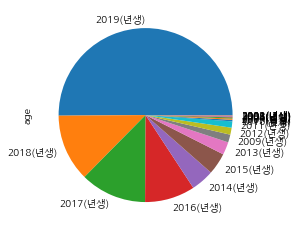

In [50]:
data.plot.pie()
plt.show()

In [52]:
data = simple_df['kindCd'].value_counts()

pd.DataFrame(data)

,kindCd
[개] 믹스견,4536
[고양이] 한국 고양이,2132
[개] 말티즈,436
[개] 푸들,380
[개] 진도견,236
[개] 포메라니안,164
[개] 시츄,121
[개] 요크셔 테리어,85
[개] 스피츠,78
[개] 치와와,72


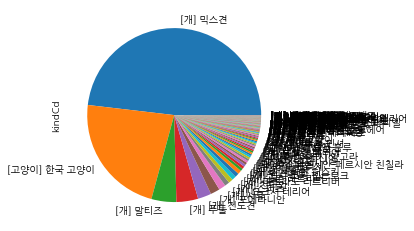

In [54]:
data.plot.pie()
plt.show()

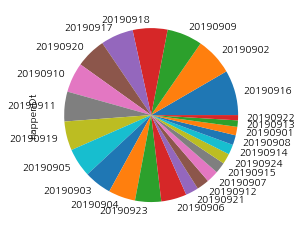

In [56]:
data = simple_df['happenDt'].value_counts()

pd.DataFrame(data)

data.plot.pie()
plt.show()

In [81]:
Days = '일월화수목금토'
weekdays = []

# for index in df.index:
#     date = simple_df['happenDt'][index]
#     weekday = (int(date) - 20190901) % 7
#     weekdays.append(Days[weekday])

for happenDt in simple_df['happenDt']:
    weekday = (int(happenDt) - 20190901) % 7
    weekdays.append(Days[weekday])
    
simple_df['happenDay'] = weekdays
# sipmle_df = simple_df.assign(happenDay=weekdays) # 이게 안됐음 왜 안되냐
simple_df.sample()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight,happenDay
9310,2018(년생),경상북도 영주시 장수면 반구리 16 영주시 동물보호센터 주소 : 영주시 장수면 반구...,영주시 동물보호센터,영주시,갈색점박이,20190901,소백로1937번길 6-4,[개] 믹스견,U,경상북도 영주시,보호중,F,신고자에 의하면 하얀거품 구토를 한다고 함,5.16(Kg),일


# 위도 경도 얻기
반복적으로 쓰기 위해 함수 만든다

In [66]:
def geocode(address):
    url = 'https://us1.locationiq.com/v1/search.php'
    payload = {
        'key': LOCATIONIQ_TOKEN,
        'q': address,
        'format': 'json'
    }
    response = requests.get(url, params=payload)
    results = response.json()
    if 'error' in results:
        return None, None
    coordinates = results[0]
    return coordinates['lat'], coordinates['lon']

In [67]:
geocode('서울창업허브')

('37.54662875', '126.949684293519')

In [68]:
geocode('이 세계 어디에도 없는 주소')

(None, None)

In [69]:
# API 호출 및 지도에 표시하는 작업을 원활히 하기 위해 자료를 500개로 제한해서 sample 데이터를 만듭니다.

sample_df = simple_df.sample(n=500, random_state=1)

sample_df.shape

(500, 14)

In [70]:
# 위도, 경도 얻기

lats = []
lngs = []

for i, index in enumerate(sample_df.index):
    print(i + 1, '-', index)
    lat, lng = geocode(sample_df['orgNm'][index])
    lats.append(lat or 0)
    lngs.append(lng or 0)

sample_df = sample_df.assign(lat=lats, lng=lngs)

sample_df.head()

1 - 5814
2 - 8777
3 - 5106
4 - 7452
5 - 8940
6 - 3370
7 - 7938
8 - 3019
9 - 4397
10 - 308
11 - 1646
12 - 2300
13 - 2666
14 - 5583
15 - 4593
16 - 6490
17 - 2488
18 - 8082
19 - 5823
20 - 4747
21 - 712
22 - 3908
23 - 1893
24 - 5864
25 - 4222
26 - 994
27 - 2698
28 - 1437
29 - 9161
30 - 956
31 - 2144
32 - 8851
33 - 8160
34 - 1117
35 - 1859
36 - 6147
37 - 5775
38 - 7413
39 - 7660
40 - 4852
41 - 3485
42 - 3421
43 - 7964
44 - 4796
45 - 2563
46 - 923
47 - 2625
48 - 6122
49 - 5431
50 - 8356
51 - 2968
52 - 6054
53 - 5524
54 - 3262
55 - 8879
56 - 6859
57 - 9297
58 - 3571
59 - 5342
60 - 2901
61 - 5708
62 - 6022
63 - 7576
64 - 4651
65 - 7718
66 - 7503
67 - 6033
68 - 4546
69 - 9033
70 - 7291
71 - 5734
72 - 2510
73 - 1297
74 - 234
75 - 1392
76 - 6277
77 - 4661
78 - 2597
79 - 3389
80 - 4903
81 - 2459
82 - 6971
83 - 2378
84 - 3722
85 - 4106
86 - 2706
87 - 4606
88 - 954
89 - 428
90 - 6653
91 - 3577
92 - 5459
93 - 1172
94 - 3160
95 - 4650
96 - 8958
97 - 4245
98 - 4557
99 - 6155
100 - 1583
101 - 6270
102 -

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight,lat,lng
5814,2017(년생),세종특별자치시 장군면 장척로 274 (장군면) 리얼펫동물병원,리얼펫동물병원,농업축산과,노랑,20190909,조치원읍 장안길,[고양이] 한국 고양이,N,세종특별자치시,보호중,M,영양실조. 극심한 탈진. 눈꼽.,1.6(Kg),36.4799999,127.289
8777,2019(년생),부산광역시 강서구 가락대로1283번길 25-2 (봉림동) (사)유기동물및보호관리협회,유기동물및관리협회,김해시,갈검,20190902,김해시 내동 155-7,[개] 믹스견,N,경상남도 김해시,보호중,F,3월추정1176,3(Kg),35.2310947,128.8908228
5106,2019(년생),경기도 평택시 진위면 야막길 108-86 (진위면),평택시유기동물보호소,평택시,기타,20190911,신장동 267-148,[개] 믹스견,N,경기도 평택시,종료(입양),F,강아지,2.2(Kg),36.9924966,127.1127168
7452,2019(년생),경상남도 거제시 사등면 사곡리 375-1번지,거제시유기동물보호소,이성민,"흰색,검정",20190905,국산초 놀이터,[개] 믹스견,U,경상남도 거제시,종료(반환),M,"녹색목줄 방울달림,케이블타이묶어놓음",4(Kg),34.8804677,128.621207
8940,2019(년생),부산광역시 강서구 맥도강변길 752-15 (대저2동),부산동물보호센터,김도연,삼색,20190902,만덕1로.52,[고양이] 한국 고양이,N,부산광역시 북구,보호중,F,"젖먹이1두,인공포유중",0.2(Kg),35.1969,128.9901999


In [71]:
# 위도, 경도만 모읍니다.

coordinates = sample_df[['lat', 'lng']]

coordinates

,lat,lng
5814,36.4799999,127.289
8777,35.2310947,128.8908228
5106,36.9924966,127.1127168
7452,34.8804677,128.621207
8940,35.1969,128.9901999
3370,35.8556705,129.2248811
7938,0,0
3019,37.4916,127.4875
4397,37.4098,126.6787
308,0,0


In [77]:
# 지도 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=5_000,
        weight=1,
        fill_color='#000',
        fill_opacity=0.1,
    )
    marker.add_to(map)

map

In [73]:
# 지도 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 히트맵 표시

HeatMap(data=coordinates, radius=20).add_to(map)

map

# jupyter notebook 형태로 공유하기(발표용)
jupyter notebook github 에 올리고 github 주소를 아래 사이트에 넣으면
 
<http://nbviewer.jupyter.org>